---
# Example IDE parsing
---

© 2020 Mide Technology Corp.

<br/>

### This example will demonstrate how to:
   - load an IDE file
   - examine the available channels in the file
   - find metadata about the file and channels in the file
   - extract and plot data from the file

<br/><br/>

### Requirements

- Python 3.5+
- numpy 1.16.6+
- matplotlib

<br/><br/>

Requirements can be installed with:

```$ pip install .[example]```

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import idelib

__author__ = 'Connor Flanigan'
__copyright__ = 'Copyright 2020, Mide Technology Corp'
__credits__ = ['Connor Flanigan']

Loading an ide file is very simple, the supporting files are defined by
default in idelib.  This function returns a Document object which contains
the data for the given file.



In [2]:
doc = idelib.importFile('../test.ide')

SimpleChannelDataBlock
ChannelDataBlock
ChannelDataArrayBlock
CalibrationList
RecordingProperties
TimeBaseUTC
RecorderConfiguration
Attribute
CalibrationList
RecordingProperties
RecorderConfiguration
ChannelDataBlock


The channels in a document are contained in an easily accessed dictionary

In [3]:
print("file: {0}".format(doc.name))
for chID in doc.channels:
    chObj = doc.channels[chID]
    print("    Channel: {0}".format(chObj))
    for schId, schObj in enumerate(chObj.subchannels):
        print("        SubChannel: {0}".format(schObj))
        print("            Data Type: {0}, units: {1}".format(*schObj.units))

file: test
    Channel: <Channel 8: 'Main Acceleration' at 0x2131e2e4408>
        SubChannel: <SubChannel 8.0: 'Main Acceleration:X' at 0x2133fdb5e48>
            Data Type: Acceleration, units: g
        SubChannel: <SubChannel 8.1: 'Main Acceleration:Y' at 0x2133fc36dc8>
            Data Type: Acceleration, units: g
        SubChannel: <SubChannel 8.2: 'Main Acceleration:Z' at 0x213405f4c88>
            Data Type: Acceleration, units: g
    Channel: <Channel 36: 'Pressure/Temperature' at 0x213405edb08>
        SubChannel: <SubChannel 36.0: 'Pressure/Temperature:Pressure/Temperature:00' at 0x213405edb88>
            Data Type: Pressure, units: Pa
        SubChannel: <SubChannel 36.1: 'Pressure/Temperature:Pressure/Temperature:01' at 0x213405eda48>
            Data Type: Temperature, units: °C


Channel 8 is the accelerometer data, so we'll start with that.
First, we get the EventArray

In [4]:
ch8EventArray = doc.channels[8].getSession()

The EventArray object has several methods to access data, but the simplest is
EventArray.arraySlice, which returns a numpy ndarray where the first row is
the time in microseconds, and the following rows are the subchannels in order

In [5]:
ch8Data = ch8EventArray.arraySlice()
ch8Time = ch8Data[0, :]/1e6
ch8NSubchannels = len(doc.channels[8].subchannels)

Now we can plot the data

for every subchannel, add a subplot, plot the data, and label the axes with
the name of the subchannel and its units

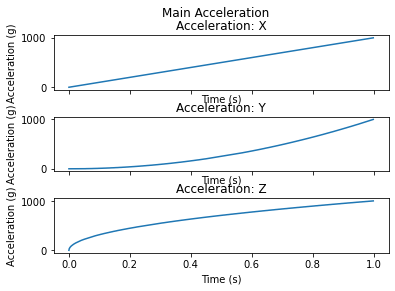

In [6]:
fig = plt.figure()
fig.suptitle(doc.channels[8].displayName)

axes = fig.subplots(ch8NSubchannels, 1,
                    sharex='all',
                    sharey='all',
                    gridspec_kw={
                        'hspace': 0.5
                        })
for i, ax, sch in zip(range(1, ch8NSubchannels + 1), axes, doc.channels[8].subchannels):
    ax.plot(ch8Time, ch8Data[i, :])
    ax.set_title(sch.displayName)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('{0} ({1})'.format(*sch.units))

We can repeat the process with channel 36, which has heterogeneous data

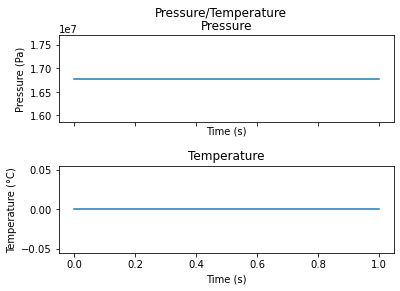

In [7]:
ch36EventArray = doc.channels[36].getSession()

ch36Data = ch36EventArray.arraySlice()
ch36Time = ch36Data[0, :]/1e6
ch36NSubchannels = len(doc.channels[36].subchannels)


fig = plt.figure()
fig.suptitle(doc.channels[36].displayName)

axes = fig.subplots(ch36NSubchannels, 1,
                    sharex='all',
                    gridspec_kw={
                        'hspace': 0.5
                        })
for i, ax, sch in zip(range(1, ch36NSubchannels + 1), axes, doc.channels[36].subchannels):
    ax.plot(ch36Time, ch36Data[i, :])
    ax.set_title(sch.displayName)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('{0} ({1})'.format(*sch.units))